In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.cluster import MiniBatchKMeans
from sklearn import metrics 

# Affichage des données MNIST

In [4]:
digits = fetch_openml(name = "mnist_784", version = 1)
y=digits['target'].astype('uint8')
X=digits.data

## Clustering

### Séparation des données en base apprentissage et test


In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=60000, test_size=10000)


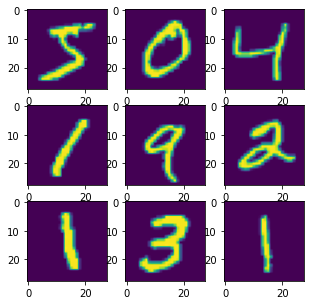

In [8]:
fig,axes=plt.subplots(3,3, figsize=(5, 5))
for i in range(9):
    axes[i//3, i %3].imshow(X[i].reshape(28,28))



In [10]:
X_train = X_train.astype('float')/255
X_test = X_test.astype('float')/255


### MiniBatchKMeans

In [12]:
kmeans = MiniBatchKMeans(n_clusters=10)
kmeans.fit(X_train)

MiniBatchKMeans(n_clusters=10)

In [14]:
def infer_cluster_labels(kmeans, actual_labels):
    inferred_labels = {}

    for i in range(kmeans.n_clusters):
        # find index of points in cluster
        labels = []
        index = np.where(kmeans.labels_ == i)
        # append actual labels for each point in cluster
        labels.append(actual_labels[index])
        # determine most common label
        if len(labels[0]) == 1:
            counts = np.bincount(labels[0])
        else:
            counts = np.bincount(np.squeeze(labels))
        # assign the cluster to a value in the inferred_labels dictionary
        if np.argmax(counts) in inferred_labels:
            # append the new number to the existing array at this slot
            inferred_labels[np.argmax(counts)].append(i)
        else:
            # create a new array in this slot
            inferred_labels[np.argmax(counts)] = [i]
        #print(labels)
        #print('Cluster: {}, label: {}'.format(i, np.argmax(counts)))
        
    return inferred_labels

cluster_labels=infer_cluster_labels(kmeans,y_train)

In [16]:
def infer_data_labels(X_labels, cluster_labels):
  # empty array of len(X)
    predicted_labels = np.zeros(len(X_labels)).astype(np.uint8)

    for i, cluster in enumerate(X_labels):
        for key, value in cluster_labels.items():
            if cluster in value:
                predicted_labels[i] = key
                
    return predicted_labels

X_clusters = kmeans.predict(X_train)
predicted_labels = infer_data_labels(X_clusters, cluster_labels)

In [21]:
def calculate_metrics(estimator, data, labels):

    # Calculate and print metrics
    print('Number of Clusters: {}'.format(estimator.n_clusters))
    print('Inertia: {}'.format(estimator.inertia_))
    print('Homogeneity: {}'.format(metrics.homogeneity_score(labels, estimator.labels_)))

clusters = [10, 16, 36, 64, 144, 256]

for n_clusters in clusters:
    estimator = MiniBatchKMeans(n_clusters = n_clusters)
    estimator.fit(X_train)
    
    # print cluster metrics
    calculate_metrics(estimator, X_train, y_train)
    
    # determine predicted labels
    cluster_labels = infer_cluster_labels(estimator, y_train)
    predicted_Y = infer_data_labels(estimator.labels_, cluster_labels)
    
    # calculate and print accuracy
    print('Accuracy: {}\n'.format(metrics.accuracy_score(y_train, predicted_Y)))

Number of Clusters: 10
Inertia: 36.243480136257816
Homogeneity: 0.47902475268078987
Accuracy: 0.5835166666666667

Number of Clusters: 16
Inertia: 34.99154828186387
Homogeneity: 0.513238624316732
Accuracy: 0.6021833333333333

Number of Clusters: 36
Inertia: 30.089149993440316
Homogeneity: 0.6980489424549405
Accuracy: 0.7787333333333334

Number of Clusters: 64
Inertia: 27.928565803822586
Homogeneity: 0.7441474414553763
Accuracy: 0.8287833333333333

Number of Clusters: 144
Inertia: 25.025097831551562
Homogeneity: 0.8092036970413834
Accuracy: 0.8732333333333333

Number of Clusters: 256
Inertia: 23.271430194058293
Homogeneity: 0.8425961007031273
Accuracy: 0.8993166666666667

